# 1. Importación de librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import cv2

**¿Que hace cada línea?**

-numpy (np)  
Sirve para manejar matrices y arrays.
Las imágenes son matrices.

-matplotlib.pyplot  (plt)  
Sirve para mostrar imágenes, gráficas, curvas de entrenamiento, etc.

-tensorflow (tf)  
Es la librería principal para crear y entrenar redes neuronales.

-tensorflow.keras.layers  / models

layers: tipos de capas (Conv2D, MaxPool, Dense…)

models: para construir modelos secuenciales o funcionales.

-train_test_split  
Divide el dataset en entrenamiento, validación y test.

-os  
Permite navegar por carpetas, leer archivos, etc.

-cv2
Lee imágenes desde carpetas, convierte en escala de grises, trasfomra en matrices y permite preprocesarlas.

#2. Descarga de dataset desde GitHub


In [ ]:
!git clone https://github.com/kaydee0502/Printed-Digits-Dataset.git

dataset_path = "/content/Printed-Digits-Dataset/assets"

fatal: destination path 'Printed-Digits-Dataset' already exists and is not an empty directory.


In [ ]:
!ls /content/Printed-Digits-Dataset

assets		    counter.pickle  loader.py  README.md
CODE_OF_CONDUCT.md  LICENSE	    model


**¿Que hace las líneas?**

!git clone  
Descarga el repositorio de GitHub directamente en Colab.
El símbolo ! indica que es un comando de terminal, no de Python.

dataset_path  
Guarda la ruta donde están las imágenes para poder acceder a ellas.

#3. Cargar imágenes y etiquetas

In [ ]:
dataset_path = "/content/Printed-Digits-Dataset/assets"

X = []
y = []

for label in range(10):
    folder = os.path.join(dataset_path, str(label))
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # leer en escala de grises
        img = img.astype("float32") / 255.0               # normalizar a [0,1]
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Imágenes cargadas:", X.shape)
print("Etiquetas cargadas:", y.shape)



Imágenes cargadas: (6299, 28, 28)
Etiquetas cargadas: (6299,)


**¿Que hace esto?**

X guarda las imágenes
Y guarda las etiqeutas (0-9).

La formula es un bucle que recorre las carpetas del 0 al 9 (que dichas carpetas tienen las imágenes).

"folder = os.path.join(dataset_path, str(label))"

Construye la ruta a la carpeta del dígito actual.

"for filename in os.listdir(folder):"

recorre los archivos dentro de la carpeta.

"img_path = os.path.join(folder, filename)"

Ruta completa de la imagen.

"img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)"

Lee la imagen en escala de grises.

"img = img.astype("float32") / 255.0"

Convierte los valores de 0–255 → 0–1.
Esto es normalización, fundamental para que la red aprenda bien.

"X.append(img) y.append(label)"

Guarda: la imagen en X, su etiqueta (0–9) en y.

"X = np.array(X)"
"y = np.array(y)"

Convierte las listas en arrays de numpy, que son más eficientes.



#4. Añadir canal (28x28x1)

In [ ]:
X = X.reshape(-1, 28, 28, 1)


¿Qué significa esto?
Las CNN esperan imágenes con 3 dimensiones:

altura

anchura

canales

En nuestro caso:

altura = 28

anchura = 28

canales = 1 (escala de grises)

El -1 significa “ajusta automáticamente el número de imágenes”.

Esto adapta las imágenes al formato que necesita la red.


#5. Dividir en train / val / test

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


¿Qué hace esto?
Primera división

70% → entrenamiento

30% → temporal (val + test)

Segunda división

15% → validación

15% → test

¿Por qué se hace?
Entrenamiento: el modelo aprende

Validación: se ajustan hiperparámetros

Test: evaluación final real

Esto garantiza que el modelo no haga trampas aprendiendo de datos que verá después.

#6. Construir el modelo.


In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

#6.1 Construir el modelo Mejorado.

In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


#7. Compilar el modelo

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


optimizer='adam'
Adam es un optimizador muy usado en Deep Learning porque:

ajusta automáticamente la tasa de aprendizaje

converge rápido

funciona muy bien con imágenes

evita quedarse atascado en mínimos malos


loss='sparse_categorical_crossentropy'
Esta es la función de pérdida, lo que el modelo intenta minimizar.

¿Por qué esta?

Porque estamos haciendo clasificación multiclase (10 dígitos)

Porque nuestras etiquetas son enteros (0, 1, 2, …, 9)

No están en one-hot encoding

Es la función correcta para clasificación con etiquetas enteras.

metrics=['accuracy']
Le decimos al modelo que queremos medir:

accuracy → porcentaje de aciertos

Esto nos permitirá ver:

accuracy de entrenamiento

accuracy de validación

Es la métrica estándar para clasificación.

Mejora

1. Mejora: Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)


NameError: name 'X_train' is not defined

#7. Entrenar el modelo

Entrenamiento Normal:

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Entrenamiento mejorado:
3. Mejora: Entrenar usando Data Augmentation

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_val, y_val)
)


¿Qué aporta?
El modelo aprende a reconocer dígitos rotados, descentrados, más grandes, más pequeños

Se vuelve mucho más robusto

Reduce errores como 3→8 o 5→8

#8. Evaluación de modelo con el conjunto de test

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Pérdida en test:", test_loss)
print("Precisión en test:", test_accuracy)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9866 - loss: 0.0512
Pérdida en test: 0.059285569936037064
Precisión en test: 0.9830687642097473


#9. Visualizar vurvas de pérdida y accuracy

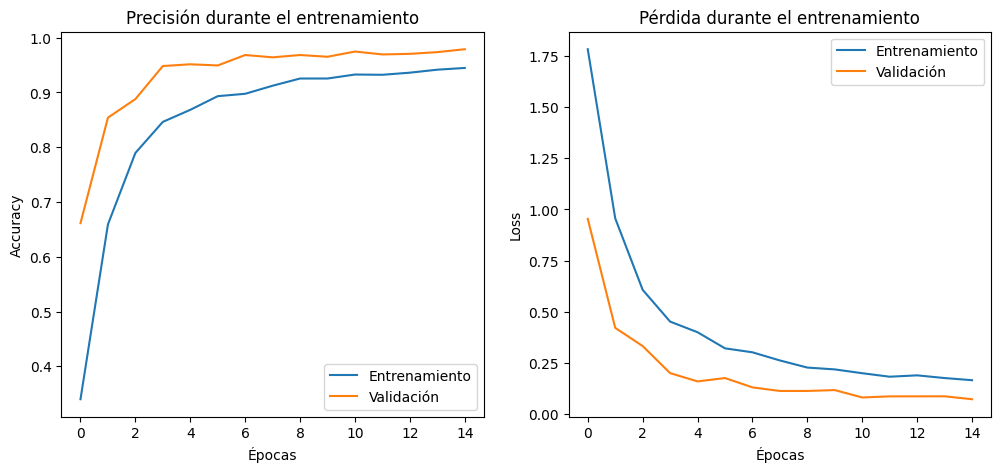

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()


#10. Prueba con imágenes reales

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


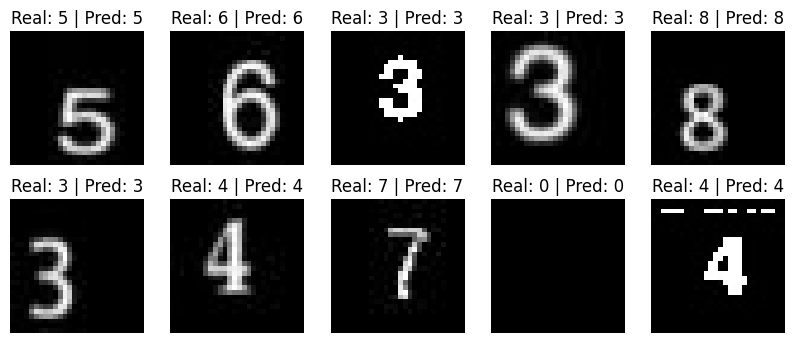

In [ ]:
import random

plt.figure(figsize=(10, 4))

for i in range(10):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx]
    label = y_test[idx]

    pred = model.predict(img.reshape(1, 28, 28, 1))
    pred_label = pred.argmax()

    plt.subplot(2, 5, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Real: {label} | Pred: {pred_label}")
    plt.axis('off')

plt.show()


# 11. Creación de función final para subir imagen y reconocer el número

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()


Saving 14980754418759_640x0.jpg to 14980754418759_640x0.jpg


Subida de imagen de cualquier fuente

In [1]:
for filename in uploaded.keys():
    # Leer imagen en escala de grises
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Redimensionar a 28x28
    img_resized = cv2.resize(img, (28, 28))

    # Normalizar
    img_norm = img_resized.astype("float32") / 255.0

    # Añadir canal
    img_input = img_norm.reshape(1, 28, 28, 1)

    # Predicción
    pred = model.predict(img_input)
    pred_label = pred.argmax()

    # Mostrar imagen y resultado
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicción: {pred_label}")
    plt.axis('off')
    plt.show()


NameError: name 'uploaded' is not defined